In [83]:
from numpy import linspace, arange, zeros
from control import c2d, tf
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
import control
import control.matlab


### Questao 1

In [2]:
T = 0.2

Gs = tf(10, [1, 5])

Gz = c2d(Gs, T)

print('Gz = \n', Gz)

Gz = 
 
  1.264
----------
z - 0.3679

dt = 0.2



In [4]:
Hs = tf(1,[1,0])

Hz = c2d(Hs, T)

print('Hz = \n', Hz)

Hz = 
 
 0.2
-----
z - 1

dt = 0.2



In [5]:
Fs = tf(1, [1, 4])

Fz = c2d(Fs, T)

print('Fz = \n', Fz)

Fz = 
 
  0.1377
----------
z - 0.4493

dt = 0.2



## Bloco das equacoes recursivas

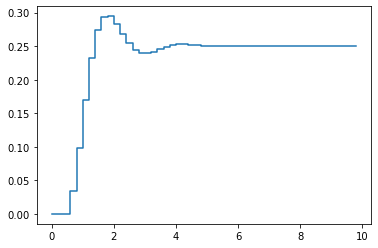

In [18]:
#Equacoes recursivas 

#G
#c[k] = 1.264*e[k-1] + 0.3679*c[k-1]

#H
#v[k] = 0.2*c[k-1] + v[k-1]

#F
#x[k] = 0,1377*r[k-1] + 0.4493*x[k-1]

#e = x - v

kmax = 50

# Para entrada degrau unitario: np.ones(kmax)
# Para entrada rampa unitario: T*arange(0,kmax) 
t = T*arange(0,kmax)
r = T*arange(0,kmax)

c = np.zeros(kmax)
v = np.zeros(kmax)
x = np.zeros(kmax)
e = np.zeros(kmax)

for k in range(1, kmax):
    c[k] = 1.264*e[k-1] + 0.3679*c[k-1]
    v[k] =0.2*c[k-1] + v[k-1]
    x[k] = 0.1377*r[k-1] + 0.4493*x[k-1]
    e[k] = x[k] - v[k]
    
# para mostrar por steps
plt.plot(t,c, ds='steps-post')

#para mostrar em tempo continuo
#plt.plot(t,c)


### Questao 2

In [60]:
# Chamaremos de bloco F o bloco com 1/(s+5)
T = 0.15

F = tf(1, [1, 5])

Fz = c2d(F, T)

print('Fz = \n', Fz)

Fz = 
 
  0.1055
----------
z - 0.4724

dt = 0.15



In [61]:
#Parametros de entrada
T = 0.15
zeta = 0.6
wn = 4

z_ang = T*wn*np.sqrt(1-(zeta**2))
print(f'angulo de Z: {z_ang}')

z_mod = np.exp(-T*zeta*wn)
print(f'modulo de Z: {z_mod}')

#transformando agora para retagunlar
z_rect = cmath.rect(z_mod, z_ang)
print(f'Z na forma retangular: {z_rect}')



angulo de Z: 0.48
modulo de Z: 0.697676326071031
Z na forma retangular: (0.6188353589683089+0.32217239864789143j)


In [62]:
# Calculando no papel vimos que como alpha cancela o polo, ele tera de ser -0,4493
alpha = -0.4724

In [64]:
# G2 foi calculado no papel
G2z = tf([0.1055],[1,-1],T)
print(G2z)


0.1055
------
z - 1

dt = 0.15



In [65]:
# Calculando o angulo para G1 passando o angulo z_rect que calculamos no sistema de G2 e fazendo G2 
# menos 180 graus conseguimos calcular a contribuicao de fase de G2 e do G1
angle_g1 = -np.pi - cmath.phase(G2z(z_rect))
print(f'angulo em radianos: {angle_g1}')
angle_degrees = math.degrees(angle_g1)
print(f'angulo em graus: {angle_degrees}')

angulo em radianos: -0.70171923898726
angulo em graus: -40.20555079710197


In [66]:
beta = (z_rect.imag - (z_rect.real*math.tan(angle))/math.tan(angle))
print('beta formula prof = ', beta)

beta formula prof =  -0.29666296032041745


In [75]:
G1z = tf([1],[1,-0.2966],T)
print(G1z)


    1
----------
z - 0.2966

dt = 0.15



In [76]:
FTMA = G1z * G2z

In [77]:
Kc = 1/np.abs(FTMA(z_rect))
print(Kc)

2.155579645089522


In [78]:
# Resultados finais
print('Resultados finais: \n')
print(f'Kc = {Kc}')
print(f'Alpha = {alpha}')
print(f'Beta2 = {beta}')

Resultados finais: 

Kc = 2.155579645089522
Alpha = -0.4724
Beta2 = -0.29666296032041745


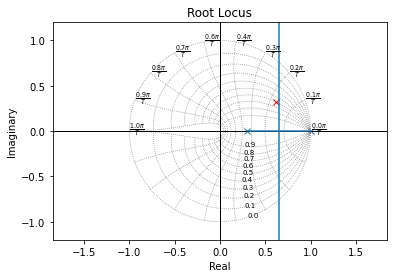

In [98]:
#Para calcular o lugar das raizes (rlocus) passamos na entrada a FTMA e o ganho Kc
control.matlab.rlocus(FTMA, [Kc])
plt.plot(z_rect.real, z_rect.imag, 'xr')
plt.xlim(-1,1)
plt.ylim(-1.2,1.2)
plt.show()
